In [45]:
import numpy as np
import pandas as pd

In [46]:
df = pd.read_csv('datasets/insurance_data.csv')

In [47]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [48]:
df.sample(3)

,age,bought_insurance
20,21,0
10,18,0
24,50,1


In [49]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [50]:
x = df.age

In [51]:
print(x)

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64


In [52]:
y = df.bought_insurance

In [53]:
print(y)

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64


In [54]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Insurance Data')

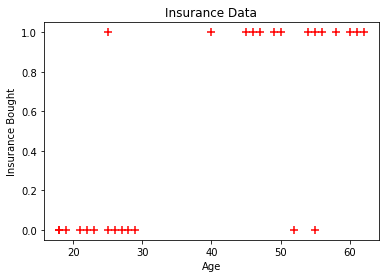

In [59]:
plt.scatter(x, y, marker = '+', color = 'red', s = 70)
plt.xlabel('Age')
plt.ylabel('Insurance Bought')
plt.title('Insurance Data')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size = 0.2)

In [14]:
x_train.size

21

In [15]:
df.index.size

27

In [16]:
x_test.size

6

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()

In [19]:
model.fit(x_train, y_train)

LogisticRegression()

In [20]:
x_test

,age
9,61
7,60
25,54
13,29
12,27
2,47


In [21]:
x_train

,age
10,18
17,58
8,62
18,19
21,26
11,28
26,23
20,21
1,25
19,18


In [22]:
y_predicted = model.predict(x_test)

In [23]:
y_predicted

array([1, 1, 1, 0, 0, 1], dtype=int64)

In [24]:
model.score(x_test, y_test)

1.0

In [25]:
# m
model.coef_

array([[0.11447361]])

In [26]:
# c
model.intercept_

array([-4.4789873])

In [27]:
import math

In [28]:
def sigmoid(y):
    return 1 / (1 + math.exp(-y))

In [29]:
def prediction_function(age):
    y = model.coef_ * age + model.intercept_
    result = sigmoid(y)
    return result

In [30]:
age = 35
prediction_function(age)

0.3840457473254302

In [31]:
age = 59
prediction_function(age)

0.9067815221245445

In [32]:
x_test

,age
9,61
7,60
25,54
13,29
12,27
2,47


In [33]:
x_test_list = x_test.age.tolist()
print(x_test_list)

[61, 60, 54, 29, 27, 47]


In [34]:
ans_list = []
for x in x_test_list:
    result = prediction_function(x)
    if result < 0.5:
        ans_list.append(0)
    else:
        ans_list.append(1)

        

In [35]:
print(ans_list)

[1, 1, 1, 0, 0, 1]


In [36]:
y_test

9     1
7     1
25    1
13    0
12    0
2     1
Name: bought_insurance, dtype: int64

In [37]:
y_test_list = y_test.tolist()

In [38]:
print(y_test_list)

[1, 1, 1, 0, 0, 1]


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm = confusion_matrix(ans_list, y_test_list)

In [41]:
cm

array([[2, 0],
       [0, 4]], dtype=int64)

In [42]:
import seaborn as sb

Text(15.0, 0.5, 'Actual')

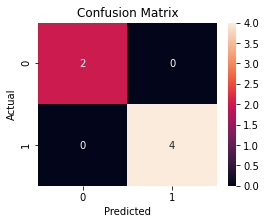

In [43]:
plt.figure(figsize = (4, 3))
sb.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')